In [2]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import time
from os import environ as env
from uuid import uuid4 as uuid

In [5]:
# from lgca import get_lgca
# from lgca.helpers import *
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# from os import environ as env
# from uuid import uuid4 as uuid

dim = 60
rc =  1
rep =  1




dens = 1
birthrate = 0.5
deathrate = 0.02

uu = str(uuid())[0:7]
saving_data = True

for i in range(0, rep):
    start = time.time()
    name = str(2*dim + dim*rc) + str(dim)

    lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
           density = dens, dims = dim, r_b = birthrate, variation = False, restchannels = rc ,r_d = deathrate)
    id = name + '_' + str(i) + '_'+ str(uu)
    lgca.timeevo_until_hom(spatial=True)
    tmax, dim, c = lgca.nodes_t.shape
    print('tmax= ', tmax)

    if saving_data:
        np.save('saved_data/' + str(id) + '_nodest', lgca.nodes_t)
        np.save('saved_data/' + str(id) + '_labels', lgca.props['lab_m'])
        np.savez('saved_data/' + str(id) + '_Parameter', density = lgca.density, restchannels = lgca.restchannels,\
        dimension=lgca.l, kappa=lgca.K, rb=lgca.r_b, rd=lgca.r_d, m=lgca.r_int)
    ende = time.time()
    print('{:5.3f}s'.format(ende-start))

standard deviation set to =  0.1
Progress: [####################] 100% Done...
tmax=  7387
15.726s


tmax, Knoten, rc 7387 60 1


<IPython.core.display.Javascript object>


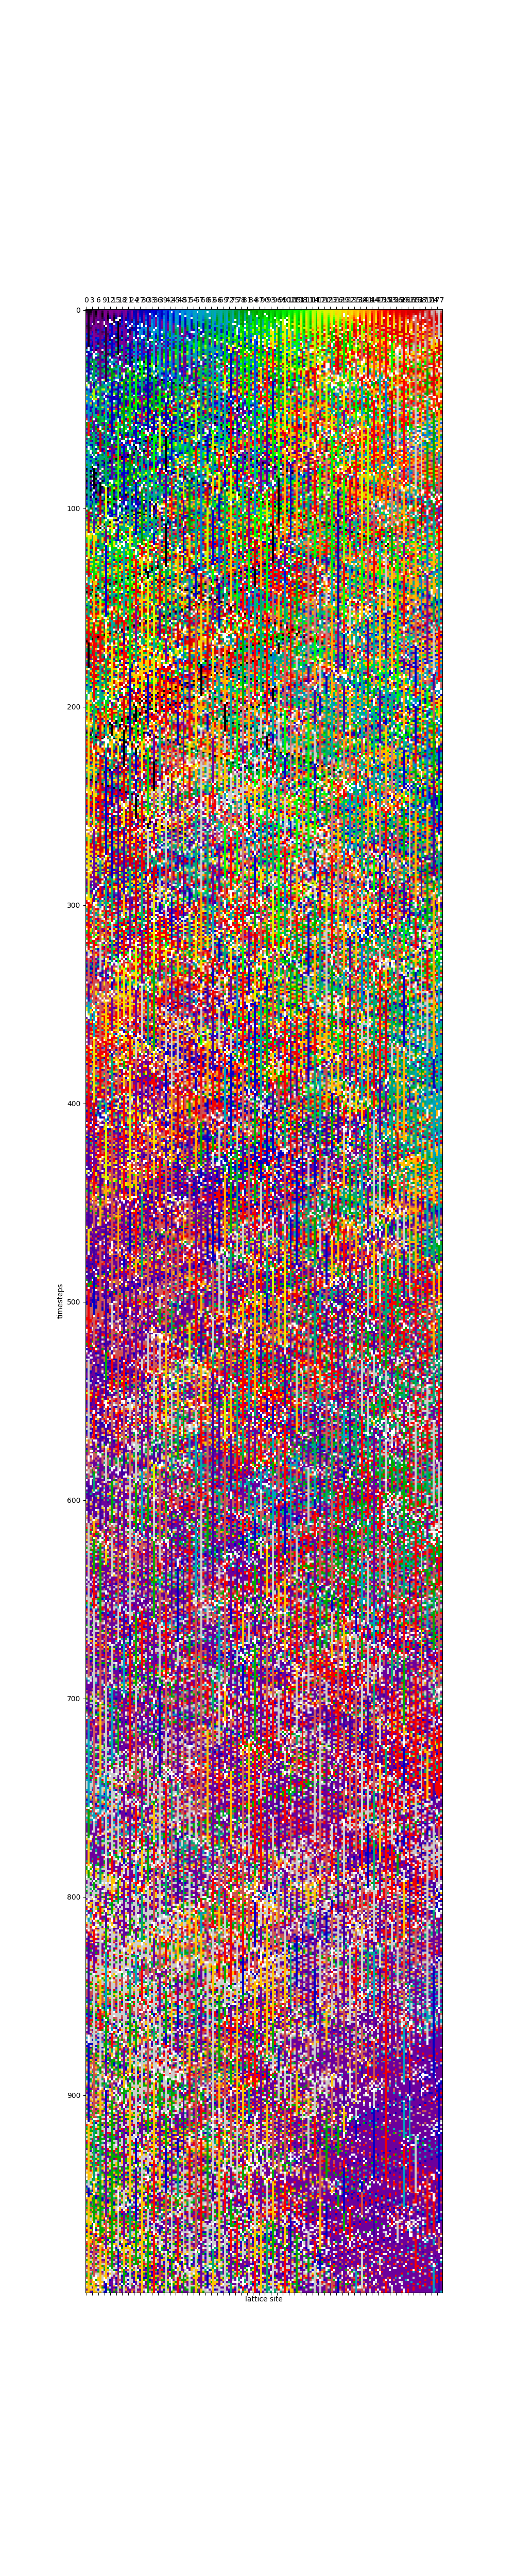

In [6]:
name = '18060_0_e49da69_'
nodes1 = np.load('saved_data/' + name + 'nodest' +'.npy')
labels1 = np.load('saved_data/' + name + 'labels' +'.npy')
%matplotlib notebook
spacetime_plot(nodes_t=nodes1, labels=labels1, tend=1000, figsize=(10,50), save=True, id=name)
# spacetime_plot(nodes_t=nodes1, labels=labels1, tbeg=5500, figsize=(10,50), save=True, id='01_1_end')

In [ ]:
nodes2 = np.load('saved_data/' + '1801_2_d80496d_nodest' +'.npy')
labels2 = np.load('saved_data/' + '1801_2_d80496d_labels' +'.npy')

%matplotlib notebook
spacetime_plot(nodes_t=nodes2, labels=labels2, tend=50, figsize=(10,10), save=True, id='01_2_anfanf')
# spacetime_plot(nodes_t=nodes2, labels=labels2, tbeg=4500, figsize=(10,50), save=True, id='01_2_end')

In [ ]:
spacetime_plot(nodes_t=nodes2, labels=labels2, figsize=(10,500), save=True, id='2_ges',tend=9000)

In [ ]:
for t in range(17400, 17503):
    lab105 = 0
    lab106 = 0
    lab0 = 0
    lab=0
    for cells in nodes2[t]:
#         print(cells)
        for cell in cells:
#             print(labels2[cell])
            if labels2[cell] == 105:
                lab105 += 1
            elif labels2[cell] == 106:
                lab106 += 1
            elif labels2[cell] == 0:
                lab0 += 1
            elif labels2[cell] != 106 and labels2[cell] != 105 and labels2[cell] != 0:
#                 print(labels2[cell])
                lab += 1
    print(lab105, lab106, lab0, lab, lab105+lab106+lab0)